 # Diplomatura en Ciencas de Datos, Aprendizaje Automático y sus Aplicaciones

 Autores: Matias Oria, Antonela Sambuceti, Pamela Pairo, Benjamín Ocampo

 ## Analisis descriptivo
 Para la respuesta a la pregunta **¿Cuáles son los lenguajes de programación
 asociados a los mejores salarios?** hay varios factores a tener en cuenta
 además del salario neto de los empleados, tales como, el tipo de contrato
 (Full Time o Part Time), si su sueldo está dolarizado o no, los años de
 experiencia, su rol de trabajo, entre otras que pueden dificultar el analisis
 de la pregunta si no nos enfocamos en una subpoblación del total de
 trabajadores. Por lo tanto, para hacer una comparación más justa optamos por
 considerar aquellos empleados que cumplan lo siguiente:

 - Contrato Full Time: Dependiendo de la cantidad de horas que se empeñe en el
   rol el salario podría verse influenciado. Por ende consideramos solamente el
   de mayor carga horaria.
 - A lo sumo 5 años de experiencia: Nos interesará saber que lenguajes otorgan
   los mejores salarios en los primeros años de trabajo.
 - Un salario neto mayor al minimo vital y móvil en la Argentina: Filtraremos
   además aquellos empleados que no superen el salario mínimo para empleados
   mensualizados.

 Esto llevó a la selección de las siguientes variables aleatorias relevantes
 `rvs`.

In [13]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from seaborn.miscplot import palplot
from seaborn.palettes import color_palette
from utils import *

# Random variables defined in utils.py
rvs = [
    work_contract_type,
    profile_years_experience,
    salary_in_usd,
    salary_monthly_NETO,
    tools_programming_language
]

assert all(rv in DB.columns.values.tolist() for rv in rvs)

df = DB[
    (DB.work_contract_type == "Full-Time") &
    (DB.salary_monthly_NETO > MINWAGE_IN_ARG) &
    (DB.profile_years_experience <= 5) &
    (DB.salary_in_usd != "Mi sueldo está dolarizado")   # TODO: this column should be cleaned before
][rvs]


 También agregaremos una columna adicional `cured_programming_language`
 utilizando la función `add_cured_col` donde a cada uno de los lenguajes de
 programación dados por la columna `tools_programming_language`, se los separa
 en listas de python. Luego apilamos sobre cada empleado sus lenguajes de
 programación utilizados dados por la columna curada utilizando la función
 `stack_col` para obtener el siguiente dataframe.

In [14]:

cured_programming_languages = "cured_programming_languages"
programming_language = "programming_language"


df = add_cured_col(
    df=df,
    cured_col=cured_programming_languages,
    uncured_col=tools_programming_language,
    cure_func=split_languages
)

df = stack_col(
    df=df,
    stacked_col=programming_language,
    unstacked_col=cured_programming_languages
)

df = df.reset_index(drop=True)

df


programming_language work_contract_type  profile_years_experience  \
0                    html          Full-Time                       5.0   
1              javascript          Full-Time                       5.0   
2                  python          Full-Time                       5.0   
3                    java          Full-Time                       1.0   
4              javascript          Full-Time                       1.0   
...                   ...                ...                       ...   
5106                 html          Full-Time                       2.0   
5107           javascript          Full-Time                       2.0   
5108               python          Full-Time                       2.0   
5109                  sql          Full-Time                       2.0   
5110           typescript          Full-Time                       2.0   

     salary_in_usd  salary_monthly_NETO  \
0              NaN              63000.0   
1              NaN              63000.0   
2              NaN              63000.0   
3              NaN              44000.0   
4              NaN              44000.0   
...            ...                  ...   
5106           NaN              53784.0   
5107           NaN              53784.0   
5108           NaN              53784.0   
5109           NaN              53784.0   
5110           NaN              53784.0   

                            tools_programming_languages  \
0                              HTML, Javascript, Python   
1                              HTML, Javascript, Python   
2                              HTML, Javascript, Python   
3                                      Java, Javascript   
4                                      Java, Javascript   
...                                                 ...   
5106  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   
5107  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   
5108  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   
5109  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   
5110  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   

                            cured_programming_languages  
0                            [html, javascript, python]  
1                            [html, javascript, python]  
2                            [html, javascript, python]  
3                                    [java, javascript]  
4                                    [java, javascript]  
...                                                 ...  
5106  [c#, css, html, javascript, python, sql, types...  
5107  [c#, css, html, javascript, python, sql, types...  
5108  [c#, css, html, javascript, python, sql, types...  
5109  [c#, css, html, javascript, python, sql, types...  
5110  [c#, css, html, javascript, python, sql, types...  

[5111 rows x 7 columns]

 ## Lenguajes de Programación más Populares
 Para cada lenguaje de programación obtenemos el conteo de su frecuencia junto
 a su salario neto promedio.

In [15]:
# TODO: Can we avoid the join clause using aggregations?
gb = df.groupby(programming_language)
count_bylangs = gb.agg(salary_monthly_NETO_mean=(salary_monthly_NETO, "mean")) \
    .join(gb.size().to_frame().rename(columns={0: "count"})) \

count_bylangs.sort_values(by="salary_monthly_NETO_mean", ascending=False).head(20)


salary_monthly_NETO_mean  count
programming_language                                 
|                                125000.000000      1
ansible                          125000.000000      1
twig                             120000.000000      1
sass                             120000.000000      1
lua                              104654.000000      1
objective-c                      102357.000000     14
nosql                            102000.000000      1
json                             100000.000000      1
terraform                         97000.000000      1
scala                             95921.296296     27
go                                87904.836744     86
kotlin                            84345.636500     60
swift                             83290.363636     33
groovy                            77603.633043     46
powershell                        75707.454545     11
dart                              75538.461538     13
ruby                              75145.687419     31
unity                             75000.000000      1
python                            73332.446574    394
aplica                            72562.500000      2

 Notar que si bien hay algunos lenguajes que tienen sueldos muy altos, su
 frecuencia es muy baja, siendo muy poco representativo. Por el contrario si
 ordenamos por frecuencia obtenemos:

In [16]:
count_bylangs.sort_values(by="count", ascending=False).head(20)


salary_monthly_NETO_mean  count
programming_language                                 
javascript                        66815.606256    820
sql                               64110.938684    646
html                              62591.117942    583
java                              71301.472026    454
css                               63425.775394    432
python                            73332.446574    394
typescript                        70895.763488    258
.net                              62093.026694    248
c#                                61889.053170    224
bash/shell                        71382.101050    219
php                               60990.365635    197
go                                87904.836744     86
kotlin                            84345.636500     60
vba                               58874.546897     58
c++                               61914.340000     50
c                                 62142.293191     47
groovy                            77603.633043     46
swift                             83290.363636     33
ruby                              75145.687419     31
r                                 64905.747500     28

 Ahora bien, ¿Cuantos empleados deben utilizar el lenguaje para ser considerado
 popular?. Si analizamos la tendencia central de la frecuencia podremos
 determinar que cantidad es representantiva. Para ello, tomamos umbrales entre
 $\{1, ... , 100\}$ calculando la media y mediana para los lenguajes de
 programación que tengan una frecuencia mayor a cada uno de esos umbrales y
 seleccionando el umbral que minimice la distancia entre estas medidas. Esto
 lo hacemos a través de la función `min_central_tendency` siendo 100 el umbral
 máximo a considerar bajo el dataframe obtenido en la celda anterior.

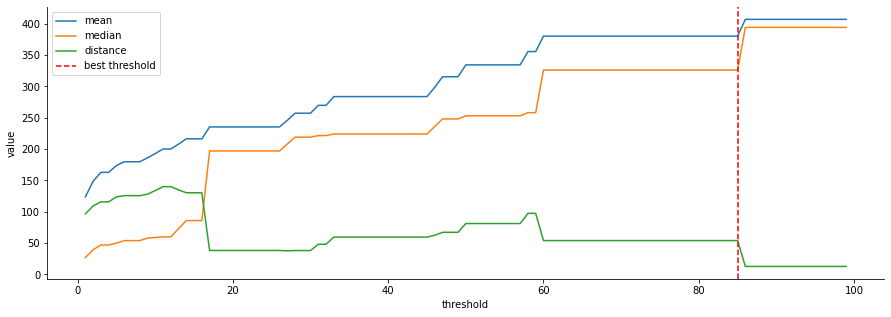

In [17]:
tendency_df, best_threshold = min_central_tendency(count_bylangs, "count", 100)

fig = plt.figure(figsize=(15, 5))
seaborn.lineplot(
    data=tendency_df,
    x="threshold", y="value", hue="metric"
)
plt.axvline(best_threshold, color="r", linestyle="--", label="best threshold")
plt.legend()
plt.ticklabel_format(style="plain", axis="x")
seaborn.despine()


 Puede verse a través de la gráfica para los distintos umbrales cuales son los
 valores de la media y mediana después del filtro, dando como menor distancia
 para el umbral marcado en lineas punteadas. También deja en evidencia que
 aquellos sin remover los lenguajes pocos usados la media y la mediana de los
 conteos resultan ser muy distantes.

In [18]:
best_langs = count_bylangs[count_bylangs["count"] >= best_threshold]
total_count = best_langs["count"].sum()
best_langs = add_cured_col(
    best_langs,
    cured_col="percentage",
    uncured_col="count",
    cure_func=lambda count: count / total_count * 100
)
best_langs.sort_values(by="salary_monthly_NETO_mean", ascending=False)


/home/benjamin/miniconda3/envs/diplodatos-ayvd/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/benjamin/miniconda3/envs/diplodatos-ayvd/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


salary_monthly_NETO_mean  count  percentage
programming_language                                             
go                                87904.836744     86    1.885551
python                            73332.446574    394    8.638456
bash/shell                        71382.101050    219    4.801579
java                              71301.472026    454    9.953957
typescript                        70895.763488    258    5.656654
javascript                        66815.606256    820   17.978513
sql                               64110.938684    646   14.163561
css                               63425.775394    432    9.471607
html                              62591.117942    583   12.782285
.net                              62093.026694    248    5.437404
c#                                61889.053170    224    4.911204
php                               60990.365635    197    4.319228

 Notar que del total de empleados que utilizan estos 12 lenguajes, el 1.9%
 tienen el mejor salario neto promedio y utilizan **Go** para programar. Luego
 les siguen **Python** con el 8.6% y **Java** con el 9.9%. Notar que en el caso
 de **Javascript** es el más popular con un 18% y un salario no muy alejado de
 los primeros puestos.

 ## Distribución de salario por lenguaje
 Utilizaremos la lista de lenguajes anterior para obtener la distribución de
 salarios por cada uno de ellos para el dataset filtrado por las condiciones
 iniciales.

In [19]:
df_langs = df[df[programming_language].isin(best_langs.index.to_list())]
df_langs


programming_language work_contract_type  profile_years_experience  \
0                    html          Full-Time                       5.0   
1              javascript          Full-Time                       5.0   
2                  python          Full-Time                       5.0   
3                    java          Full-Time                       1.0   
4              javascript          Full-Time                       1.0   
...                   ...                ...                       ...   
5106                 html          Full-Time                       2.0   
5107           javascript          Full-Time                       2.0   
5108               python          Full-Time                       2.0   
5109                  sql          Full-Time                       2.0   
5110           typescript          Full-Time                       2.0   

     salary_in_usd  salary_monthly_NETO  \
0              NaN              63000.0   
1              NaN              63000.0   
2              NaN              63000.0   
3              NaN              44000.0   
4              NaN              44000.0   
...            ...                  ...   
5106           NaN              53784.0   
5107           NaN              53784.0   
5108           NaN              53784.0   
5109           NaN              53784.0   
5110           NaN              53784.0   

                            tools_programming_languages  \
0                              HTML, Javascript, Python   
1                              HTML, Javascript, Python   
2                              HTML, Javascript, Python   
3                                      Java, Javascript   
4                                      Java, Javascript   
...                                                 ...   
5106  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   
5107  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   
5108  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   
5109  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   
5110  C#, CSS, HTML, Javascript, Python, SQL, TypeSc...   

                            cured_programming_languages  
0                            [html, javascript, python]  
1                            [html, javascript, python]  
2                            [html, javascript, python]  
3                                    [java, javascript]  
4                                    [java, javascript]  
...                                                 ...  
5106  [c#, css, html, javascript, python, sql, types...  
5107  [c#, css, html, javascript, python, sql, types...  
5108  [c#, css, html, javascript, python, sql, types...  
5109  [c#, css, html, javascript, python, sql, types...  
5110  [c#, css, html, javascript, python, sql, types...  

[4561 rows x 7 columns]

 Antes de visualizar como distribuyen los salarios nos interesará eliminar los
 outliers para cada lenguaje. Esto se realiza por medio de `clean_outliers`
 removiendo para cada lenguaje, los salarios que estén a una distancia 2.5
 veces su desvio estandar.

In [20]:
df_langs = clean_outliers_bygroup(
    df_langs,
    by=programming_language,
    column_name=salary_monthly_NETO
)
df_langs[[programming_language, salary_monthly_NETO]] \
    .groupby(programming_language) \
    .describe()


salary_monthly_NETO                                       \
                                   count          mean           std      min   
programming_language                                                            
.net                               224.0  62094.056339  24097.430313  19650.0   
bash/shell                         198.0  71308.788535  26387.552766  20000.0   
c#                                 197.0  61341.938629  24303.212674  19650.0   
css                                372.0  63080.085941  27149.094905  22000.0   
go                                  75.0  88591.292800  25775.618967  35900.0   
html                               517.0  62601.926035  31440.613893  19650.0   
java                               401.0  70715.187007  30412.830245  19900.0   
javascript                         725.0  66907.809834  32420.839573  19650.0   
php                                173.0  61390.526185  30434.484031  20000.0   
python                             347.0  72587.947983  27643.581732  20000.0   
sql                                560.0  63906.895339  26934.965656  19650.0   
typescript                         220.0  70681.331727  32135.176536  20000.0   

                                                              
                          25%       50%        75%       max  
programming_language                                          
.net                  42000.0  59000.00   76000.00  207000.0  
bash/shell            50000.0  68801.00   87542.00  165000.0  
c#                    41000.0  58600.00   75000.00  207000.0  
css                   42000.0  59000.00   75775.00  290000.0  
go                    73120.5  83000.00  106000.00  150000.0  
html                  42000.0  58431.00   75000.00  470000.0  
java                  48000.0  65000.00   89000.00  290000.0  
javascript            45000.0  61000.00   82000.00  470000.0  
php                   40000.0  55022.36   77000.00  290000.0  
python                53950.0  68000.00   89000.00  195000.0  
sql                   43634.5  59150.00   78664.75  290000.0  
typescript            50000.0  64500.00   84000.00  270000.0

 Notar que el 25% de los empleados que utilizan **Go** cobran a lo sumo
 \$73120.50 de salario neto y el 75% \$106000, posicionandose como el lenguaje
 mejor pago, llegando hasta un máximo de \$150000 mensuales! También puede
 verse que en su mayoría el minimo salario está cerca del vital y móvil
 decretado por el país. También los lenguajes **Javascript**, **HTML**, y
 **CSS** otorgan salarios similares, ¿Distribuiran de manera similar? Los
 siguientes boxenplots mustran dicha similitud.

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='programming_language'>

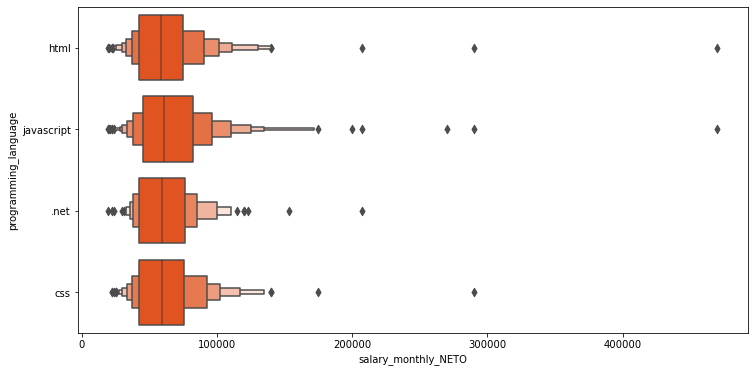

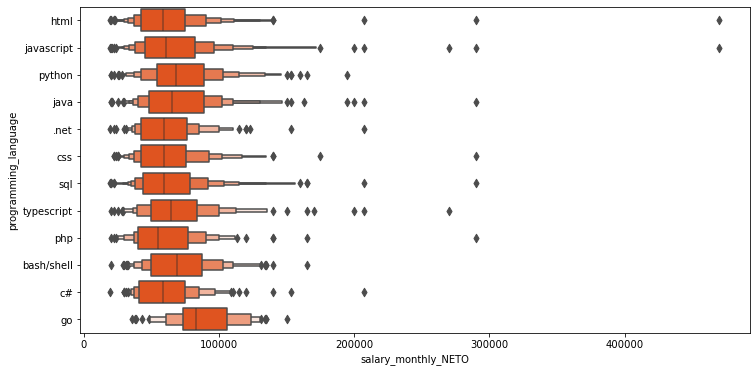

In [21]:
similar_langs = ["html", "javascript", ".net", "css"]
plt.figure(figsize=(12, 6))
seaborn.boxenplot(
    data=df_langs[df_langs[programming_language].isin(similar_langs)],
    x=salary_monthly_NETO, y=programming_language,
    color='orangered'
)
plt.ticklabel_format(style='plain', axis='x')


plt.figure(figsize=(12, 6))
seaborn.boxenplot(
    data=df_langs,
    x=salary_monthly_NETO, y=programming_language,
    color='orangered'
)


 Notar como el rango intercuartil para cada una de las distribuciones de
 salarios se encuentra por debajo de los \$100000 salvo para **Go** que
 ligeramente lo supera, sin embargo tenemos una asimetría o sesgo hacia los
 valores más chicos de la distribución. Lo cual nos diría que, si bien es el
 lenguaje mayor pago, un poco más del 50% tienen un salario menor que los
 \$100000. A pesar de este sesgo es el único de los 12 que no presenta grandes
 asimetrias en sus colas y cuyos valores extremos no son tan altos. Notar como
 Javascript, HTML, .NET y CSS distribuyen de manera similar. Esto nos daría
 como trabajo a futuro revisar si esto se mantiene para distintos roles de los
 empleados dentro de la compañia. Por último los boxplots dejan en evidencia su
 desventaja al no tener información sobre el primer y el cuarto cuantiles.

 ## Asociación
 Para ver si existe una correlación entre el salario bruto y el neto analizamos
 el coeficiente de correlación de Pearson $\rho$ entre estas variables aleatorias.

In [22]:
salary_cols = [salary_monthly_NETO, salary_monthly_BRUTO]
DB[salary_cols].corr()


salary_monthly_NETO  salary_monthly_BRUTO
salary_monthly_NETO              1.000000              0.833335
salary_monthly_BRUTO             0.833335              1.000000

 Notar que el valor de $\rho$ entre los salarios nos dá un valor positivo
 cercano a 1. Esto nos indica que existe una correlación entre las variables
 que se comporta aproximadamente lineal pero que aún así podría aún haber una
 fuerte relación no lineal entre ellas. También podemos visualizar la
 distribución conjunta de estas variables por medio un `scatterplot`.

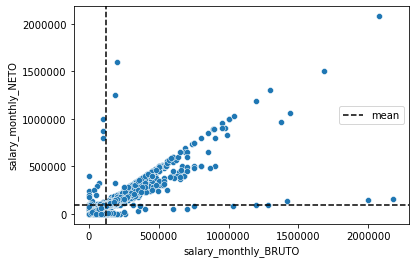

In [23]:
seaborn.scatterplot(data=DB[salary_cols], x=salary_monthly_BRUTO, y=salary_monthly_NETO)
plt.axvline(DB[salary_monthly_BRUTO].mean(), color="black", linestyle="--", label="mean")
plt.axhline(DB[salary_monthly_NETO].mean(), color="black", linestyle="--")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()


 Claramente concuerda con el valor del $\rho$, sin embargo también deja en
 evidencia que un valor cerca de 1 no necesariamente implica que al incrementar
 el valor de una variable causa que la otra incremente. Lo único que nos dice
 es que una grán cantidad de sueldos en bruto están asociados con otra numerosa
 cantidad de sueldos en neto. Pero esto no ocurre para valores que están
 realmente alejados de la media de ambas variables. Si bien podrían ser
 considerados outliers, otros más cercanos siguen este comportamiento que
 dejarían en cuestión si realmente puede considerarse eliminar la columna de
 salario bruto.

 TODO: Cambiar la conclusión para poner que se puede sacar la columna de bruto

 ## Densidad Conjunta
 1) El análisis de la Densidad Conjunta, en un primer momento nos permite
    detectar si existe algún patrón o compartamiento determinado entre dos
    variables, es decir si una variable se ve afectada ante un cambio en la
    otra. Si vemos que existe una cierta dependencia entre ellas, podemos
    incluso modelar una función de densidad o probalidad conjunta.

    Para variables numericas es util calcular medidas como la Covarianza o el
    Coeficiente de Correlación Lineal de Pearson, y tambien usar gráficos como
    por ejemplo de dispersión o de lineas. En cambio para variables categóricas
    es más frecuente usar como visualizaciones las tablas de frecuencias
    relativas o gráficos de barras. Cuando analizamos una variable categorica y
    una numerica son comunes los gráficos de barra o gráficos de caja.

 ## Elección de las Variables
 Categóricas: `work_province`, `work_contract_type`

 Numéricas: `salary_monthly_NETO`, `profile_years_experience`, `profile_age`


In [24]:
rvs = [
    work_province,
    work_contract_type,
    salary_monthly_NETO,
    profile_years_experience,
    profile_age
]

df = DB[
    (DB[profile_years_experience] < 50) &
    (DB[profile_age] < 100) &
    (DB[salary_monthly_NETO] > MINWAGE_IN_ARG)
][rvs]

df = clean_outliers(df, salary_monthly_NETO)
df.describe().round(2)

salary_monthly_NETO  profile_years_experience  profile_age
count              5492.00                   5492.00      5492.00
mean              87459.55                      8.84        32.55
std               48795.27                      7.03         7.26
min               18665.00                      0.00        18.00
25%               54000.00                      3.00        27.00
50%               79000.00                      7.00        31.00
75%              105000.00                     13.00        37.00
max              340099.00                     44.00        67.00

 ## Análisis de Años de Experiencia y Salario Neto

In [25]:
df[[salary_monthly_NETO, profile_years_experience]].corr()

salary_monthly_NETO  profile_years_experience
salary_monthly_NETO                  1.000000                  0.347364
profile_years_experience             0.347364                  1.000000

 Se observa que $\rho$ entre los años de experiencia y el salario neto es
 positivo pero próximo a 0. Lo cual significa que no tienen una relación lineal
 fuerte como se observa en el siguioente gráfico de dispersión.

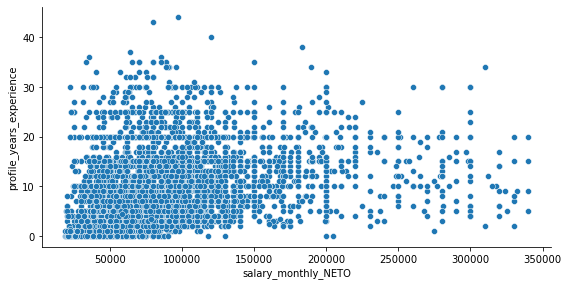

In [26]:
seaborn.pairplot(
    data=df,
    y_vars=[profile_years_experience],
    x_vars=[salary_monthly_NETO],
    height=4,aspect=2
)
plt.ticklabel_format(style='plain', axis='x')


<AxesSubplot:xlabel='profile_years_experience', ylabel='salary_monthly_NETO'>

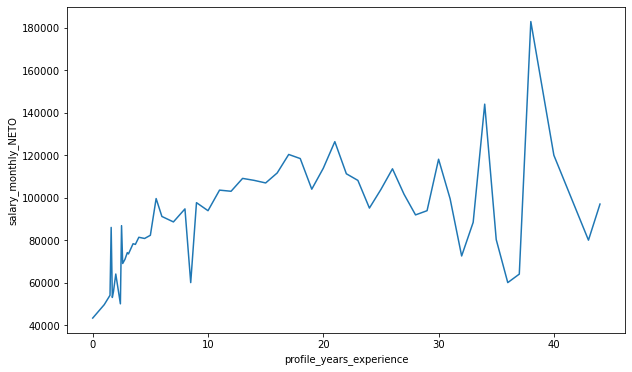

In [27]:
plt.figure(figsize=(10,6))
seaborn.lineplot(
    data=df,
    x=profile_years_experience, y=salary_monthly_NETO,
    estimator= 'mean' , ci=None
)

 Observamos que la variable años de experiencia, al ser discreta, optamos por
 generar rangos para poder interpretar mejor la relación de estas variables. A
 pesar de los picos, notar que existe una tendencia creciente para los primeros
 15 años de experiencia, pero luego dejan de observarse un patrón determinado.

In [28]:
df['profile_years_segment'] = to_categorical(df[profile_years_experience], max_cut=30)


[(0, 10), (10, 20), (20, 30), (30, 44)]


 Con el siguiente gráfico podemos visualizar mejor la relación entre años de
 experiencia y salario mensual neto. Podemos observar que los salarios netos en
 promedio rondan en los 125000 para el rango de 10 a 40 años de experiencia,
 sin embargo para el rango comprendido entre 0 y 10 años de experiencia y entre
 40 y 50 años de experiencia el salario promedio baja.
 Notar que para los primeros 10 años de experiencia el intervalo de confianza
 es mucho más chico debido a que su estimación está dada por una muestra más
 representativa que para los intervalos (10, 20], (20, 30] y (30, 44]. Siendo
 este último el menos confiable. Ahora bien, es claro ver que el salario neto
 medio aumenta a partir de los primeros 10 años de experiencia. Esto lo
 confirma el siguiente cuadro de medidas descriptivas

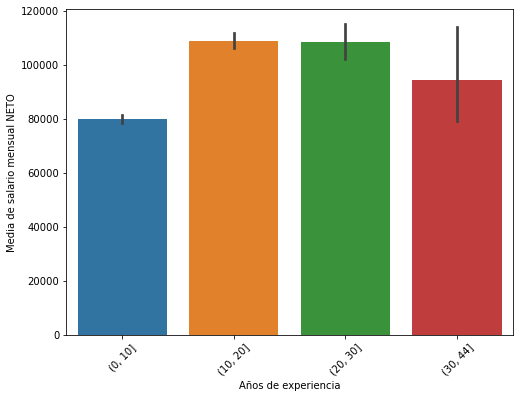

In [29]:

fig = plt.figure(figsize=(8,6))
seaborn.barplot(data=df, x='profile_years_segment', y='salary_monthly_NETO', estimator=np.mean)
plt.xticks(rotation=45)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("Años de experiencia")
plt.ticklabel_format(style='plain', axis='y')

In [30]:
group_col = 'profile_years_segment'
Tabla_1= df[[group_col, salary_monthly_NETO]].groupby(group_col).describe().sort_values(by="profile_years_segment",ascending=True)
Tabla_1

salary_monthly_NETO                               \
                                    count           mean           std   
profile_years_segment                                                    
(0, 10]                            3396.0   79889.852132  42755.992864   
(10, 20]                           1477.0  108888.046831  52987.798108   
(20, 30]                            300.0  108480.423400  56246.597014   
(30, 44]                             36.0   94435.722222  53081.424128   

                                                                        
                           min      25%        50%       75%       max  
profile_years_segment                                                   
(0, 10]                18729.0  52000.0   72243.03   95000.0  340000.0  
(10, 20]               22000.0  75000.0  100000.00  130000.0  340099.0  
(20, 30]               22000.0  70000.0   95000.00  130000.0  300000.0  
(30, 44]               33000.0  69250.0   80000.00   92125.0  310000.0

 ## ANÁLISIS PROVINCIAS DE ARGENTINA Y SALARIO NETO

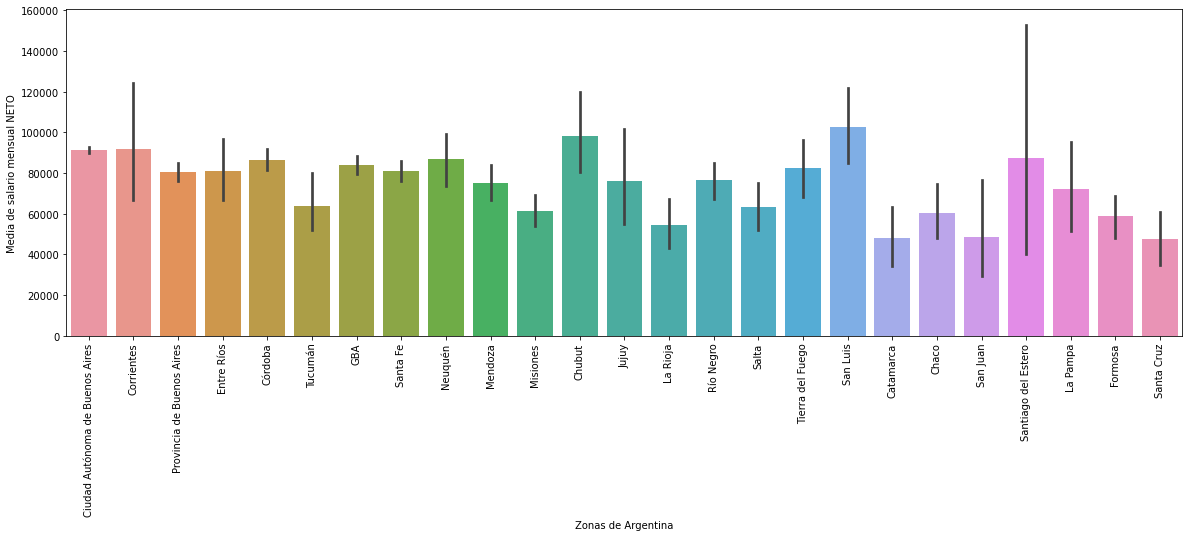

In [31]:
fig = plt.figure(figsize=(20,6))
seaborn.barplot(y=df[salary_monthly_NETO], x=df[work_province], estimator=np.mean)
plt.xticks(rotation=90)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("Zonas de Argentina")
plt.ticklabel_format(style='plain', axis='y')

 No es claro visualizar este gráfico con tantas categorías y además vemos que
 existen ciertas provincias con muy pocos valores, procedemos a agrupar por
 zonas.

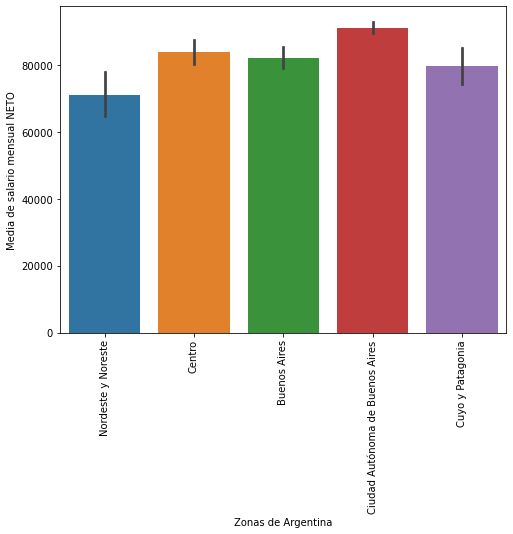

In [32]:

new_groups = {'Jujuy':'Nordeste y Noreste',
'Salta':'Nordeste y Noreste',
'Tucumán':'Nordeste y Noreste',
'Catamarca':'Nordeste y Noreste',
'Santiago del Estero':'Nordeste y Noreste',
'La Rioja':'Nordeste y Noreste',
'Corrientes':'Nordeste y Noreste',
'Entre Ríos':'Nordeste y Noreste',
'Chaco':'Nordeste y Noreste',
'Misiones':'Nordeste y Noreste',
'Formosa':'Nordeste y Noreste',
'GBA':'Buenos Aires',
'Provincia de Buenos Aires':'Buenos Aires',
'Córdoba':'Centro',
'Santa Fe':'Centro',
'La Pampa':'Centro',
'Santiago del Estero':'Centro',
'San Luis':'Cuyo y Patagonia',
'Mendoza':'Cuyo y Patagonia',
'San Juan':'Cuyo y Patagonia',
'Tierra del Fuego':'Cuyo y Patagonia',
'Santa Cruz':'Cuyo y Patagonia',
'Río Negro':'Cuyo y Patagonia',
'Chubut':'Cuyo y Patagonia',
'Neuquén':'Cuyo y Patagonia'}
order = ['Nordeste y Noreste', 'Centro', 'Buenos Aires','Ciudad Autónoma de Buenos Aires', 'Cuyo y Patagonia']
df["grouped_province"] = df[work_province].replace(new_groups)
fig = plt.figure(figsize=(8,6))
seaborn.barplot(y=df[salary_monthly_NETO], x=df["grouped_province"], estimator=np.mean, 
                                order=order
                )
plt.xticks(rotation=90)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("Zonas de Argentina")
plt.ticklabel_format(style='plain', axis='y')

In [33]:
df[["grouped_province", salary_monthly_NETO]].groupby("grouped_province").describe()

salary_monthly_NETO                \
                                              count          mean   
grouped_province                                                    
Buenos Aires                                  887.0  82038.487317   
Centro                                        739.0  83832.556942   
Ciudad Autónoma de Buenos Aires              3441.0  91141.645513   
Cuyo y Patagonia                              216.0  79525.211250   
Nordeste y Noreste                            209.0  70868.856268   

                                                                          \
                                          std      min      25%      50%   
grouped_province                                                           
Buenos Aires                     48571.844877  19000.0  50000.0  71033.0   
Centro                           51132.326743  20000.0  52601.5  72000.0   
Ciudad Autónoma de Buenos Aires  48409.788706  18665.0  58000.0  83000.0   
Cuyo y Patagonia                 39008.399265  19000.0  51925.0  73077.5   
Nordeste y Noreste               49603.291887  18729.0  40000.0  58000.0   

                                                     
                                      75%       max  
grouped_province                                     
Buenos Aires                      99550.0  340000.0  
Centro                            99000.0  340000.0  
Ciudad Autónoma de Buenos Aires  110000.0  340099.0  
Cuyo y Patagonia                 100000.0  252000.0  
Nordeste y Noreste                80000.0  300000.0

 Podemos observar que para las regiones del Centro, Buenos Aires y Cuyo y
 Patagonia el salario medio es similar y cercano al salario medio del total de
 la muestra. Sin embargo, para la región del Nordeste y Noreste es ligeramente
 más baja.

 ## 3. Años de Edad - Tipos de Contrato

No handles with labels found to put in legend.
[(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 67)]


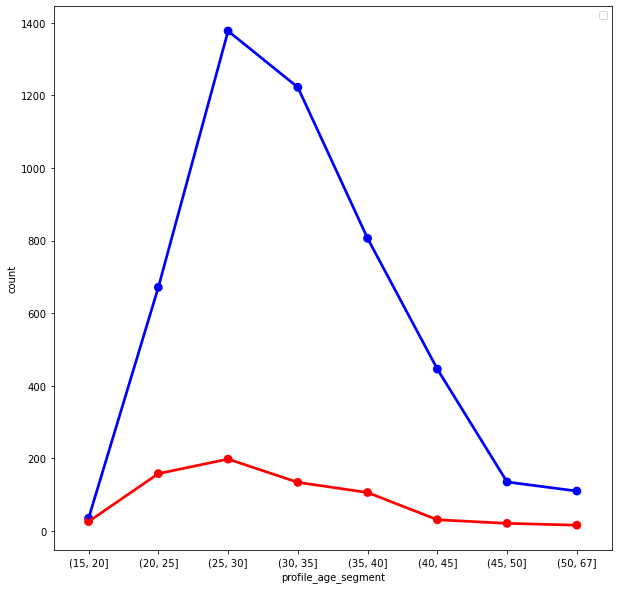

In [34]:

df["profile_age_segment"] = to_categorical(df[profile_age], bin_size=5, min_cut=15, max_cut=50)

fig = plt.figure(figsize=(10,10))
df_ages_fulltime = df[df[work_contract_type] == "Full-Time"] \
    .groupby("profile_age_segment").size() \
    .to_frame().rename(columns={0: "count"}) \
    .reset_index()
df_ages_nofulltime = df[df[work_contract_type] != "Full-Time"] \
    .groupby("profile_age_segment").size() \
    .to_frame().rename(columns={0: "count"}) \
    .reset_index()

seaborn.pointplot(
    data=df_ages_fulltime,
    x="profile_age_segment", y="count",
    color='b',
    legend='fulltime'
)

seaborn.pointplot(
    data=df_ages_nofulltime,
    x="profile_age_segment", y="count",
    color='r',
    legend='nofulltime'
)
plt.legend()
plt.show()

 ## 4. Tipos de Contraros Y Salarios Netos Medios

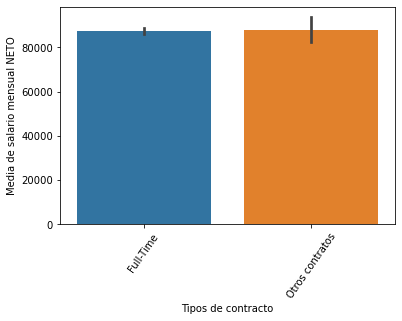

In [35]:
new_groups = {'Part-Time':'Otros contratos',
'Tercerizado (trabajo a través de consultora o agencia)':'Otros contratos',
'Remoto (empresa de otro país)':'Otros contratos',
'Freelance':'Otros contratos'}
grouped_contract = df.work_contract_type.replace(new_groups)
seaborn.barplot(y=df['salary_monthly_NETO'], x=grouped_contract, estimator=np.mean)
plt.xticks(rotation=55)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("Tipos de contracto")
plt.ticklabel_format(style='plain', axis='y')


 Observamos que la media de los otros contratos en considerablemente superior
 que los Full - Time. Veamos especificamente en que tipo de contrato se
 encuentran esos mayores sueldo

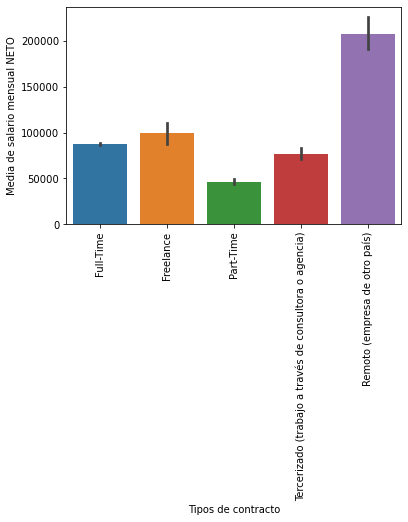

In [36]:
seaborn.barplot(y=df['salary_monthly_NETO'], x=df['work_contract_type'], estimator=np.mean)
plt.xticks(rotation=90)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("Tipos de contracto")
plt.ticklabel_format(style='plain', axis='y')


 Los mayores sueldos se encuentran en las personas que trabajan de forma Remota
 para otro país, es decir los sueldos dolarizados.

In [37]:
group_col = 'work_contract_type'
Tabla_2= df[[group_col,"salary_monthly_NETO"]].groupby(group_col).describe()
Tabla_2


salary_monthly_NETO  \
                                                                 count   
work_contract_type                                                       
Freelance                                                        131.0   
Full-Time                                                       4802.0   
Part-Time                                                        267.0   
Remoto (empresa de otro país)                                     98.0   
Tercerizado (trabajo a través de consultora o a...               194.0   

                                                                   \
                                                             mean   
work_contract_type                                                  
Freelance                                            99149.580153   
Full-Time                                            87401.668407   
Part-Time                                            46471.213820   
Remoto (empresa de otro país)                       207846.247449   
Tercerizado (trabajo a través de consultora o a...   76596.307216   

                                                                           \
                                                             std      min   
work_contract_type                                                          
Freelance                                           66745.904887  20000.0   
Full-Time                                           44002.910939  19650.0   
Part-Time                                           26921.728750  18665.0   
Remoto (empresa de otro país)                       88465.876261  20000.0   
Tercerizado (trabajo a través de consultora o a...  41799.500015  21000.0   

                                                                        \
                                                         25%       50%   
work_contract_type                                                       
Freelance                                            47500.0   80000.0   
Full-Time                                            57000.0   80000.0   
Part-Time                                            30000.0   42000.0   
Remoto (empresa de otro país)                       136750.0  203750.0   
Tercerizado (trabajo a través de consultora o a...   48000.0   69000.0   

                                                                        
                                                         75%       max  
work_contract_type                                                      
Freelance                                           145000.0  280000.0  
Full-Time                                           105000.0  340099.0  
Part-Time                                            55000.0  310000.0  
Remoto (empresa de otro país)                       288750.0  340000.0  
Tercerizado (trabajo a través de consultora o a...   92750.0  330000.0

 ## Densidad condicional
 Estudie la distribución del salario según el nivel de estudio.
 Separe la población según el nivel de estudio (elija dos subpoblaciones
 numerosas) y grafique de manera comparativa ambos histogramas de la variable
 'salary_monthly_NETO' ¿Considera que ambas variables son independientes? ¿Qué
 analizaría al respecto?
 Calcule medidas de centralización y dispersión para cada subpoblación

 ## Distribución del salario neto y nivel de estudio

Study Level  Frecuency
0  Universitario       3731
1      Terciario       1036
2     Secundario        403
3       Posgrado        297
4      Doctorado         24
5       Primario          2
6   Posdoctorado          2

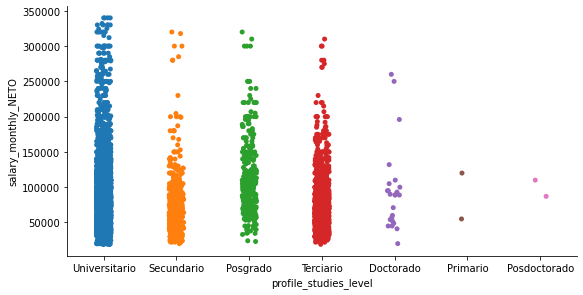

In [38]:
df = DB[(DB[salary_monthly_NETO] > MINWAGE_IN_ARG)]
df = clean_outliers(df, salary_monthly_NETO)

seaborn.catplot(data=df, y='salary_monthly_NETO',
                x='profile_studies_level', height=4, aspect=2)

Study_count = df.profile_studies_level.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Study Level', 'profile_studies_level':'Frecuency'})
Study_count[:10]

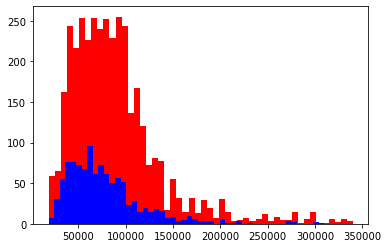

In [39]:
salary_col= 'salary_monthly_NETO'
df_U = df[df['profile_studies_level'] == 'Universitario']
df_T =df[df['profile_studies_level'] == 'Terciario']

plt.hist(df_U[salary_col], color='red', bins=50)
plt.hist(df_T[salary_col], color='blue', bins=50)
plt.show()

 La probabilidad de estar por arriba del promedio sin importar el grado de
 estudio 33,13%, mientras que la probabilidad de estar por arriba del promedio
 teniendo un nivel de estudio terciario es de el 23,88 %

In [40]:
avg_salary = df[salary_monthly_NETO].mean()

p_above_avg = len(df[df[salary_col] >= avg_salary]) / len(df)

is_above_avg = len(df[df[salary_col] > avg_salary])#Cantidad A
Terciario= len(df[df["profile_studies_level"] == "Terciario"]) #Cantidad B
Total=len(df) #Cantidad Total
condicion= (df[salary_col] > avg_salary) & (df["profile_studies_level"] == "Terciario")
Prob_AB=len(df[condicion])/Terciario

is_above_avg2 = len(df[df[salary_col] > avg_salary])#Cantidad A
Universitario = len(df[df["profile_studies_level"] == "Universitario"]) #Cantidad B
Total2=len(df) #Cantidad Total
condicion2= (df[salary_col] > avg_salary) & (df["profile_studies_level"] == "Universitario")
Prob_AB2=len(df[condicion2])/Universitario
Prob_AB2

print(
    f"La probabilidad de estar por arriba del promedio sin importar el grado de estudio es {p_above_avg * 100:.2f}%"
)
print(
    f"mientras que la probabilidad de estar por arriba del promedio \
    teniendo un nivel de estudio terciario es de el {Prob_AB * 100:.2f}%"
)
print(
    f"Teniendo estudios universitarios es {Prob_AB2 * 100:.2f}%"
)


La probabilidad de estar por arriba del promedio sin importar el grado de estudio es 40.58%
mientras que la probabilidad de estar por arriba del promedio     teniendo un nivel de estudio terciario es de el 30.60%
Teniendo estudios universitarios es 42.43%


In [41]:

Prob_A= is_above_avg/Total
Prob_B= Terciario/Total

(round(Prob_A * Prob_B, 4), round(Prob_AB, 4))

(0.0765, 0.306)

In [42]:
(round(Prob_AB, 4), round(Prob_A, 4))


(0.306, 0.4058)

 Densidad Conjunto Condicional

In [43]:
rvs = [
    work_province,
    work_contract_type,
    salary_monthly_NETO,
    profile_years_experience,
    profile_gender
]

df = DB[
    (DB[profile_years_experience] < 50) &
    (DB[profile_age] < 100) &
    (DB[salary_monthly_NETO] > MINWAGE_IN_ARG) &
    (DB.salary_in_usd != "Mi sueldo está dolarizado")
][rvs]

df = clean_outliers(df, salary_monthly_NETO)
df.describe().round(2)


salary_monthly_NETO  profile_years_experience
count              4949.00                   4949.00
mean              79865.61                      8.76
std               36234.28                      7.06
min               18665.00                      0.00
25%               52500.00                      3.00
50%               75000.00                      7.00
75%              100000.00                     13.00
max              225000.00                     44.00

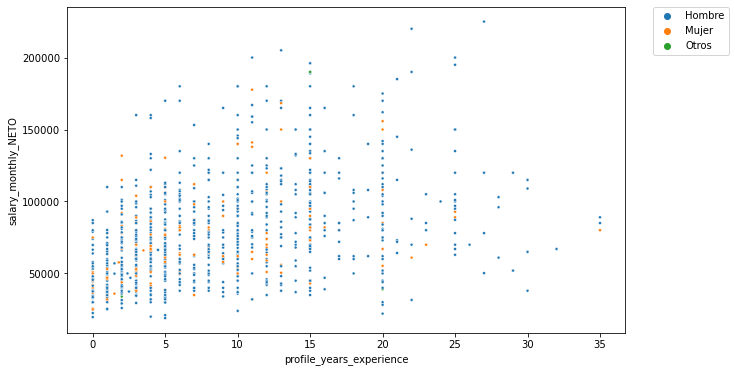

In [44]:

plt.figure(figsize=(10,6))
seaborn.scatterplot(data=df.sample(1000), 
    x=profile_years_experience, y=salary_monthly_NETO,
    marker='.',
    hue=profile_gender
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)